**Table of contents**    
- Importing libraries    
- Reading and cleaning the data    
- Logistic regression model    
  - Data partitioning    
  - Fitting the model on the train set    
  - Classification report on the train set    
  - Confusion matrix on the train set    
  - Interpretation of the results:    
  - ROC Curve    
  - Fitting the model on the test set    
  - Classification report for the test set    
  - Confusion matrix for the test set    
  - Interpretation of the results:    
  - ROC curve    
- RandomOverSampler    
  - Fitting the model with upsampled train data on the train set    
  - Classification report for the model with upsampled train data on the train set    
  - Interpretation of the results:    
  - Fitting the model with upsampled train data on the test set    
  - Classification report for the model with upsampled train data on the test set    
  - Interpretation of the results:    
- Random Forest    
  - Fitting the Random Forest model on the train set    
  - Classification report for the Random Forest model on the train set    
  - Interpretation of the results:    
  - Fitting the Random Forest model on the test set    
  - Classification report for the Random Forest model on the test set    
  - Interpretation of the results:    
- Summarize - models comparison    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=false
	flat=false
	minLevel=2
	maxLevel=3
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Predicting whether a particular patient has diabetes or not

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

## Reading and cleaning the data

In [2]:
df = pd.read_csv('diabetes2.csv')

#### 0's in columns below should be replaced with NaN because one can't have 0 BMI etc

In [3]:
def replace_zeros_with_na(x):
    return(np.where(x==0,np.NaN,x))

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].apply(replace_zeros_with_na)

In [4]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,NaN,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,NaN,NaN,30.1


<AxesSubplot: >

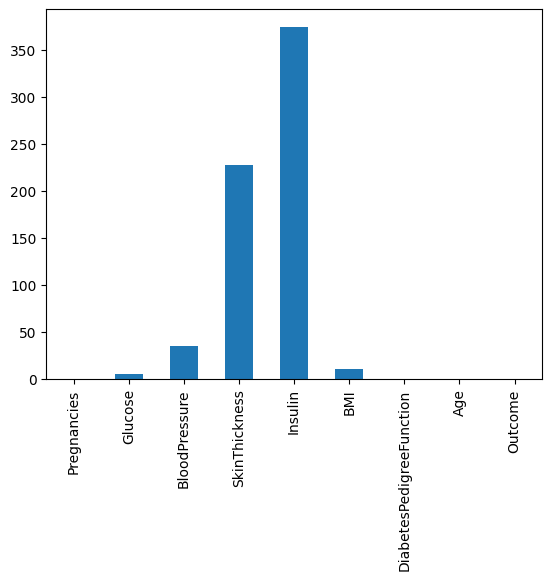

In [5]:
df.isna().sum().plot(kind="bar")

In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [9]:
df.iloc[:,0:8]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47


In [10]:
df = df.dropna()

## Logistic regression model

### Data partitioning

#### Age, SkinThickness, BMI, DiabetesPedigreeFunction and Insulin were dropped because they were statistically insignificant

In [11]:
x = df.drop(['Outcome','Age','SkinThickness','BMI','DiabetesPedigreeFunction','Insulin'],axis=1)
y = df['Outcome']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=354)
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

x_train: (274, 3)
x_test: (118, 3)
y_train: (274,)
y_test: (118,)


### Fitting the model on the train set

In [12]:
model = sm.Logit(y_train,x_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.599521
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  274
Model:                          Logit   Df Residuals:                      271
Method:                           MLE   Df Model:                            2
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                 0.07435
Time:                        13:59:13   Log-Likelihood:                -164.27
converged:                       True   LL-Null:                       -177.46
Covariance Type:            nonrobust   LLR p-value:                 1.863e-06
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.1290      0.045      2.894      0.004       0.042       0.216
Glucose           0.

In [13]:
y_train_pred = model.predict(x_train)

In [14]:
y_train_pred

376    0.126893
71     0.573332
593    0.354800
128    0.151598
741    0.566038
         ...   
493    0.409487
696    0.533927
92     0.239127
91     0.297500
345    0.342391
Length: 274, dtype: float64

In [15]:
def output(x):
    if x >=0.5:
        return 1
    else:
        return 0

In [16]:
y_train_pred = y_train_pred.apply(output)

In [17]:
y_train_pred

376    0
71     1
593    0
128    0
741    1
      ..
493    0
696    1
92     0
91     0
345    0
Length: 274, dtype: int64

In [18]:
y_train

376    0
71     0
593    0
128    1
741    0
      ..
493    1
696    1
92     0
91     0
345    0
Name: Outcome, Length: 274, dtype: int64

### Classification report on the train set

In [19]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       178
           1       0.58      0.44      0.50        96

    accuracy                           0.69       274
   macro avg       0.66      0.63      0.64       274
weighted avg       0.68      0.69      0.68       274



### Confusion matrix on the train set

In [20]:
print(confusion_matrix(y_train,y_train_pred))

[[148  30]
 [ 54  42]]


### Interpretation of the results:
* Out of all patients that the model predicted as non-diabetic, 73% of them were non-diabetic (precision)
* Out of all patients that the model predicted as diabetic, 58% of them were diabetic (precision)
* The model correctly predicted 83% of non-diabetic patients (recall)
* The model correctly predicted 44% of diabetic patients (recall)
* The model correctly predicted 69% of the observations (accuracy)

### ROC Curve

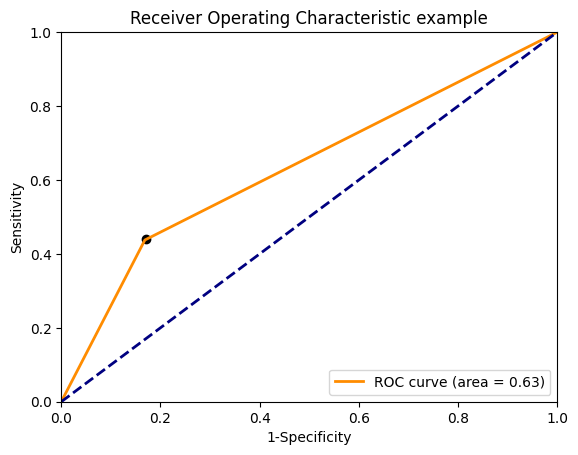

In [21]:
fpr, tpr, _ = roc_curve(y_train, y_train_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.scatter([0.17], [0.44], color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic example')
plt.legend(loc="lower right")
plt.show()

### Fitting the model on the test set

In [22]:
y_test_pred = model.predict(x_test)

In [23]:
y_test_pred

534    0.268564
490    0.236398
311    0.225586
18     0.660338
665    0.190058
         ...   
356    0.539719
297    0.182087
271    0.360435
480    0.528722
85     0.252769
Length: 118, dtype: float64

In [24]:
y_test_pred = y_test_pred.apply(output)

In [25]:
y_test_pred

534    0
490    0
311    0
18     1
665    0
      ..
356    1
297    0
271    0
480    1
85     0
Length: 118, dtype: int64

### Classification report for the test set

In [26]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        84
           1       0.62      0.53      0.57        34

    accuracy                           0.77       118
   macro avg       0.72      0.70      0.71       118
weighted avg       0.76      0.77      0.77       118



### Confusion matrix for the test set

In [27]:
print(confusion_matrix(y_test,y_test_pred))

[[73 11]
 [16 18]]


### Interpretation of the results:
* Out of all patients that the model predicted as non-diabetic, 82% of them were non-diabetic (precision)
* Out of all patients that the model predicted as diabetic, 62% of them were diabetic (precision)
* The model correctly predicted 87% of non-diabetic patients (recall)
* The model correctly predicted 53% of diabetic patients (recall)
* The model correctly predicted 77% of the observations (accuracy)

### ROC curve

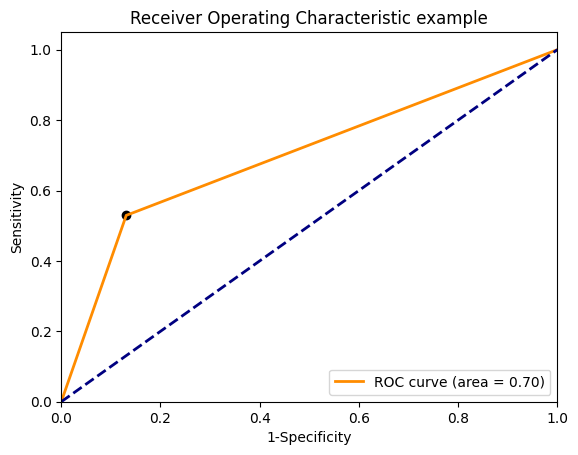

In [28]:
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.scatter([0.13], [0.53],color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Accuracy score (0.77) is slightly higher than no information rate from the test set (0.71)

In [29]:
y_test.value_counts()

0    84
1    34
Name: Outcome, dtype: int64

In [30]:
84/(84+34)

0.711864406779661

## RandomOverSampler

#### Trying RandomOverSampler to make the 0's and 1's even in the train set

In [31]:
rand_sampler = RandomOverSampler(random_state=123)

x_train_upsampled, y_train_upsampled = rand_sampler.fit_resample(x_train,y_train)

print(f'x_train_upsampled: {x_train_upsampled.shape}')
print(f'y_train_upsampled: {y_train_upsampled.shape}')

x_train_upsampled: (356, 3)
y_train_upsampled: (356,)


In [32]:
print(y_train_upsampled.value_counts())

0    178
1    178
Name: Outcome, dtype: int64


### Fitting the model with upsampled train data on the train set

In [33]:
model2 = sm.Logit(y_train_upsampled,x_train_upsampled).fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.623784
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  356
Model:                          Logit   Df Residuals:                      353
Method:                           MLE   Df Model:                            2
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                  0.1001
Time:                        13:59:17   Log-Likelihood:                -222.07
converged:                       True   LL-Null:                       -246.76
Covariance Type:            nonrobust   LLR p-value:                 1.888e-11
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.1114      0.037      2.994      0.003       0.038       0.184
Glucose           0.

In [34]:
y_train_upsampled

0      0
1      0
2      0
3      1
4      0
      ..
351    1
352    1
353    1
354    1
355    1
Name: Outcome, Length: 356, dtype: int64

In [35]:
y_train_upsampled_pred = model2.predict(x_train_upsampled)

In [36]:
y_train_upsampled_pred = y_train_upsampled_pred.apply(output)

### Classification report for the model with upsampled train data on the train set

In [37]:
print(classification_report(y_train_upsampled,y_train_upsampled_pred))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65       178
           1       0.66      0.76      0.70       178

    accuracy                           0.68       356
   macro avg       0.68      0.68      0.68       356
weighted avg       0.68      0.68      0.68       356



### Interpretation of the results:
* Out of all patients that the model predicted as non-diabetic, 71% of them were non-diabetic (precision)
* Out of all patients that the model predicted as diabetic, 66% of them were diabetic (precision)
* The model correctly predicted 60% of non-diabetic patients (recall)
* The model correctly predicted 76% of diabetic patients (recall)
* The model correctly predicted 68% of the observations (accuracy)

### Fitting the model with upsampled train data on the test set

In [38]:
y_test

534    0
490    0
311    0
18     0
665    0
      ..
356    1
297    0
271    0
480    1
85     0
Name: Outcome, Length: 118, dtype: int64

In [39]:
model2.predict(x_test).apply(output)

534    0
490    0
311    0
18     1
665    0
      ..
356    1
297    0
271    0
480    1
85     0
Length: 118, dtype: int64

### Classification report for the model with upsampled train data on the test set

In [40]:
print(classification_report(y_test,model2.predict(x_test).apply(output)))

              precision    recall  f1-score   support

           0       0.91      0.63      0.75        84
           1       0.48      0.85      0.62        34

    accuracy                           0.69       118
   macro avg       0.70      0.74      0.68       118
weighted avg       0.79      0.69      0.71       118



### Interpretation of the results:
* Out of all patients that the model predicted as non-diabetic, 91% of them were non-diabetic (precision)
* Out of all patients that the model predicted as diabetic, 48% of them were diabetic (precision)
* The model correctly predicted 63% of non-diabetic patients (recall)
* The model correctly predicted 85% of diabetic patients (recall)
* The model correctly predicted 69% of the observations (accuracy)

## Random Forest

In [41]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=786,max_depth=3)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=786)

### Fitting the Random Forest model on the train set

In [42]:
y_train_rf_pred = rf_classifier.predict(x_train)

In [43]:
y_train

376    0
71     0
593    0
128    1
741    0
      ..
493    1
696    1
92     0
91     0
345    0
Name: Outcome, Length: 274, dtype: int64

In [44]:
y_train_rf_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

### Classification report for the Random Forest model on the train set

In [45]:
print(classification_report(y_train,y_train_rf_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       178
           1       0.76      0.60      0.67        96

    accuracy                           0.80       274
   macro avg       0.79      0.75      0.76       274
weighted avg       0.79      0.80      0.79       274



### Interpretation of the results:
* Out of all patients that the model predicted as non-diabetic, 81% of them were non-diabetic (precision)
* Out of all patients that the model predicted as diabetic, 76% of them were diabetic (precision)
* The model correctly predicted 90% of non-diabetic patients (recall)
* The model correctly predicted 60% of diabetic patients (recall)
* The model correctly predicted 80% of the observations (accuracy)

### Fitting the Random Forest model on the test set

In [46]:
y_test_rf_pred = rf_classifier.predict(x_test)

### Classification report for the Random Forest model on the test set

In [47]:
print(classification_report(y_test,y_test_rf_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        84
           1       0.56      0.65      0.60        34

    accuracy                           0.75       118
   macro avg       0.71      0.72      0.71       118
weighted avg       0.77      0.75      0.76       118



### Interpretation of the results:
* Out of all patients that the model predicted as non-diabetic, 85% of them were non-diabetic (precision)
* Out of all patients that the model predicted as diabetic, 56% of them were diabetic (precision)
* The model correctly predicted 80% of non-diabetic patients (recall)
* The model correctly predicted 65% of diabetic patients (recall)
* The model correctly predicted 75% of the observations (accuracy)

## Summarize - models comparison

In [48]:
pd.DataFrame({'model_type':['logistic_regression',
                            'logistic_regression',
                            'logistic_regression with upsampling',
                            'logistic_regression with upsampling',
                            'random forest',
                            'random forest'],
              'train_or_test':['train','test','train','test','train','test'],
              'precision_0':[0.73,0.82,0.71,0.91,0.81,0.85],
              'precision_1':[0.58,0.62,0.66,0.48,0.76,0.56],
              'recall_0':[0.83,0.87,0.60,0.63,0.90,0.8],
              'recall_1':[0.44,0.53,0.76,0.85,0.6,0.65],
              'accuracy_score':[0.69,0.77,0.68,0.69,0.8,0.75]})

,model_type,train_or_test,precision_0,precision_1,recall_0,recall_1,accuracy_score
0,logistic_regression,train,0.73,0.58,0.83,0.44,0.69
1,logistic_regression,test,0.82,0.62,0.87,0.53,0.77
2,logistic_regression with upsampling,train,0.71,0.66,0.60,0.76,0.68
3,logistic_regression with upsampling,test,0.91,0.48,0.63,0.85,0.69
4,random forest,train,0.81,0.76,0.90,0.60,0.80
5,random forest,test,0.85,0.56,0.80,0.65,0.75
